# Image Segmentation
**July 8th, 2022**


In [14]:
# Load Libraries
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import math

## Problem
Count the number of coins in the image.

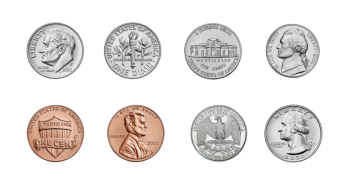

In [15]:
# img = plt.imread("many_coins.jpg")
img = plt.imread("coins.jpg")
plt.imshow(img); plt.axis("off");

### Hough Circle Transformation

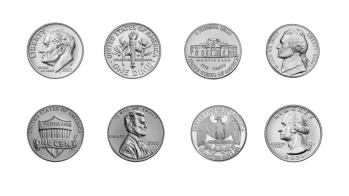

In [16]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
plt.imshow(gray,cmap="gray",vmin=0,vmax=255); plt.axis("off");

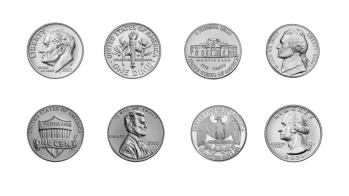

In [17]:

blurred = cv.medianBlur(gray, 5)
plt.imshow(gray,cmap="gray",vmin=0,vmax=255); plt.axis("off");


Total number of coins = 8


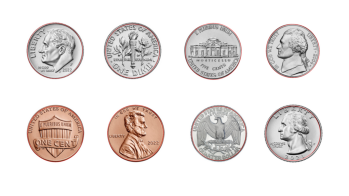

In [18]:

# Paremeters
# min_r = 150; max_r = 180;
min_r = 300; max_r = 320;

# Algorithm to find circular objects in the image -- need to specify several parameters
# Read: https://pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/
# Read: https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html

circles = cv.HoughCircles(
        blurred,  # source image (blurred and grayscaled)
        cv.HOUGH_GRADIENT,  # type of detection
        1,  # inverse ratio of accumulator res. to image res.
        250,  # minimum distance between the centers of circles
        param1=100,  # Gradient value passed to edge detection
        param2=30,  # accumulator threshold for the circle centers
        minRadius=min_r,  # min circle radius
        maxRadius=max_r,  # max circle radius
    )

print(f"Total number of coins = {len(circles[0])}")

# Check the answer
coins_copy = img.copy()
for detected_circle in circles[0]:
    x_coor, y_coor, detected_radius = detected_circle
    coins_detected = cv.circle(coins_copy, (int(x_coor), int(y_coor)), int(detected_radius), (255, 0, 0), 2)

plt.imshow(coins_detected); plt.axis("off");


### Coin Classification
We need to identify which coins are there in the picture. For this we need to label data.

What is a label? It is some property of the object. Some examples are
  * Radius of the coin
  * Picture on the coin
  * Etc.

We need labels to be unique so that objects can be distinguished.

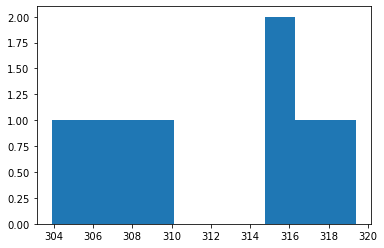

In [19]:
# Check radius of coins
radius = []
for detected_circle in circles[0]:
   _, _, detected_radius = detected_circle
   radius.append(detected_radius)
plt.hist(radius);

8


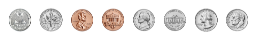

In [20]:
# Plot each coin separately
separateCoins = []
count = 0
for detected_circle in circles[0]:
   x, y, r = detected_circle
   r = 1.2*r
   i1 = int(x-r); i2 = int(x+r);
   j1 = int(y-r); j2 = int(y+r);
   separateCoins.append(img[j1:j2,i1:i2])
   count = count + 1
   plt.subplot(3,11,count)
   plt.imshow(separateCoins[count-1]); plt.axis("off")
   
print(len(separateCoins))

(-0.5, 733.5, 733.5, -0.5)

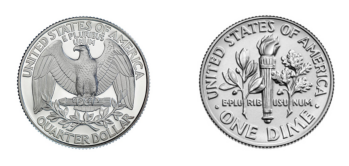

In [21]:
plt.subplot(1,2,1);plt.imshow(separateCoins[0]); plt.axis("off")
plt.subplot(1,2,2);plt.imshow(separateCoins[1]); plt.axis("off")